In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [29]:
import pandas as pd
import numpy as np
import keras
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1926,693,France,Male,31,1,0.00,2,0,1,182270.88,0
6915,658,Germany,Male,31,2,77082.65,2,0,0,13482.28,0
9468,613,Germany,Female,45,9,142765.24,2,1,0,34749.65,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2785,640,43,7,132412.38,1,0,0,69584.30,1,False,False,True
184,804,50,4,0.00,1,1,1,8546.87,1,False,False,False
6606,792,31,6,71269.89,2,0,1,125912.77,0,False,False,True


In [14]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Exited'])
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [57]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\spatr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [73]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3118 - val_accuracy: 0.8500 - val_loss: 0.3457
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3100 - val_accuracy: 0.8519 - val_loss: 0.3486
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3105 - val_accuracy: 0.8556 - val_loss: 0.3496
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3210 - val_accuracy: 0.8506 - val_loss: 0.3483
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3107 - val_accuracy: 0.8512 - val_loss: 0.3488
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8736 - loss: 0.3094 - val_accuracy: 0.8519 - val_loss: 0.3475
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3216 - val_accuracy: 0.8525 - val_loss: 0.3479
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3149 - val_accu

In [69]:
model.layers[0].get_weights()

[array([[ 0.1209675 , -0.2563346 ,  0.19026521, -0.12809366,  0.3217646 ,
          0.06205999,  0.01851147,  0.06192048,  0.09158405,  0.14521119],
        [ 1.8139085 , -0.27241817,  0.45723185,  0.44289696, -0.78910774,
          0.5332191 , -0.56443673, -0.12445605, -0.05469409, -0.84773993],
        [-0.11595117,  0.14149679, -0.2541074 ,  0.13635042, -0.27222496,
          0.5336119 , -0.141691  , -0.06294531,  0.11451818, -0.05239486],
        [-0.27018875, -0.09516235, -0.54146135, -0.5488179 , -0.44126064,
         -0.73522   ,  0.07337726, -0.58297074, -0.09476945, -0.35448775],
        [-0.05494034,  0.09314791, -0.6789759 ,  0.0637835 ,  0.02967341,
         -0.02884929,  0.08751539, -1.3882072 ,  1.5058053 , -0.20977558],
        [-0.10839776, -0.5429313 , -0.24654506, -0.38899785, -0.05750908,
          1.0612481 ,  1.0806949 , -0.0748526 ,  0.09712309, -0.37677798],
        [ 0.2555388 , -0.9937298 ,  0.5130489 ,  1.11451   , -0.42557248,
          0.33985698, -0.2170171

In [70]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [71]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

In [74]:
import matplotlib.pyplot as plt

In [75]:
history.history

{'accuracy': [0.8696874976158142,
  0.8695312738418579,
  0.8690624833106995,
  0.8698437213897705,
  0.8687499761581421,
  0.8696874976158142,
  0.8684375286102295,
  0.8693749904632568,
  0.8709375262260437,
  0.8693749904632568,
  0.8685937523841858,
  0.8681250214576721,
  0.8685937523841858,
  0.8682812452316284,
  0.8696874976158142,
  0.8701562285423279,
  0.8685937523841858,
  0.8692187666893005,
  0.8696874976158142,
  0.8695312738418579,
  0.8704687356948853,
  0.8690624833106995,
  0.8687499761581421,
  0.8678125143051147,
  0.8690624833106995,
  0.8682812452316284,
  0.8696874976158142,
  0.8687499761581421,
  0.8676562309265137,
  0.8670312762260437,
  0.8696874976158142,
  0.8700000047683716,
  0.8693749904632568,
  0.8682812452316284,
  0.8690624833106995,
  0.8689062595367432,
  0.8692187666893005,
  0.8689062595367432,
  0.8700000047683716,
  0.8690624833106995,
  0.8690624833106995,
  0.8698437213897705,
  0.8673437237739563,
  0.8681250214576721,
  0.8689062595367432

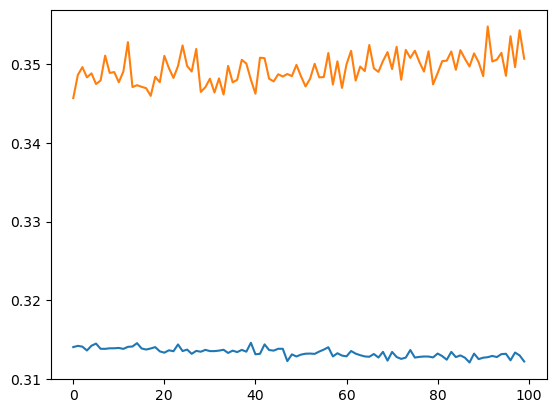

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])